     |████████████████████████████████| 411.5 MB 7.1 kB/s 
     |████████████████████████████████| 503 kB 55.8 MB/s 
     |████████████████████████████████| 50 kB 8.6 MB/s 
     |████████████████████████████████| 3.8 MB 61.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires tensorboard~=2.6, but you have tensorboard 1.15.0 which is incompatible.
tensorflow 2.7.0 requires tensorflow-estimator<2.8,~=2.7.0rc0, but you have tensorflow-estimator 1.15.1 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
TensorFlow 1.x selected.


Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])



Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 6s 666us/step - loss: 2.5409 - accuracy: 0.3742 - val_loss: 2.0279 - val_accuracy: 0.4982
Epoch 2/20
8982/8982 [==============================] - 5s 560us/step - loss: 1.9350 - accuracy: 0.4939 - val_loss: 1.8611 - val_accuracy: 0.5191
Epoch 3/20
8982/8982 [==============================] - 5s 537us/step - loss: 1.7718 - accuracy: 0.5418 - val_loss: 1.7696 - val_accuracy: 0.5485
Epoch 4/20
8982/8982 [==============================] - 5s 548us/step - loss: 1.8562 - accuracy: 0.4689 - val_loss: 1.7444 - val_accuracy: 0.5601
Epoch 5/20
8982/8982 [==============================] - 5s 539us/step - loss: 1.6574 - accuracy: 0.5737 - val_loss: 1.7168 - val_accuracy: 0.5539
Epoch 6/20
8982/8982 [==============================] - 5s 567us/step - loss: 1.5395 - accuracy: 0.6043 - val_loss: 1.5623 - val_accuracy: 0.5975
Epoch 7/20
8982/8982 [==============================] - 5s 559us/step - los

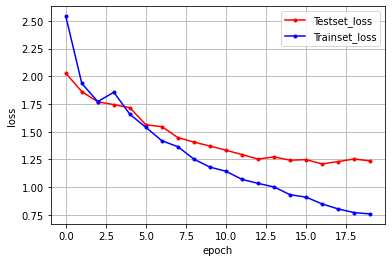

In [ ]:
!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
